In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import StratifiedKFold,permutation_test_score
from sklearn.ensemble import RandomForestClassifier

# Condition 1

In [18]:
means = [1.1,1.5,2.1,2.9]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([1]*n)
    time.append([ii+1]*n)
df1 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])

# condition 2

In [19]:
means = [1.2,1.4,2.4,3.1]
stds = [.8,.7,.9,.8]
n = 9
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([2]*n)
    time.append([ii+1]*n)
df2 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])

# condition 3

In [20]:
means = [1.0,1.2,2.1,2.8]
stds = [.8,.7,.9,.8]
n = 11
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([3]*n)
    time.append([ii+1]*n)
df3 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])

# condition 4

In [21]:
means = [1.1,1.2,2.3,2.8]
stds = [.8,.7,.9,.8]
n = 10
temp = [];condition = []; time = [];# phase in one condition
for ii,(m,s) in enumerate(zip(means,stds)):
    temp.append(np.random.normal(m,s,size=int(n)))
    condition.append([4]*n)
    time.append([ii+1]*n)
df4 = pd.DataFrame(np.vstack([np.concatenate(temp),
           np.concatenate(condition),
           np.concatenate(time)]).T,
                 columns = ['measure','condition','time'])

In [22]:
df = pd.concat([df1,df2,df3,df4])

In [24]:
import seaborn as sns

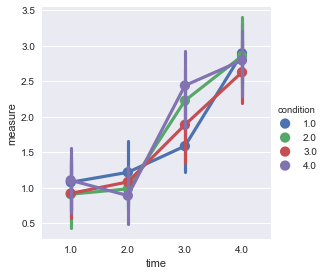

In [26]:
sns.factorplot(x='time',y='measure',hue='condition',data=df)

In [30]:
for time in [1,2,3,4]:
    working_df = df[df['time'] == time]
    x = working_df['measure'].values
    y = working_df['condition'].values
    x = x.reshape(x.shape[0],1)
    clf = RandomForestClassifier(random_state=12345)
    cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=12345)
    print('time at %d'%(time))
    score, permutation_scores, pvalue = permutation_test_score(clf,
                                                              x,y,cv=cv,
                                                              random_state=12345,
                                                              scoring='accuracy')
    print("Classification score %s (pvalue : %s)" % (score, pvalue))

time at 1
Classification score 0.245726495726 (pvalue : 0.60396039604)
time at 2
Classification score 0.249145299145 (pvalue : 0.485148514851)
time at 3
Classification score 0.379487179487 (pvalue : 0.0594059405941)
time at 4
Classification score 0.274786324786 (pvalue : 0.39603960396)


What the print out said in above is that at time 3, there a borderline difference.

In [31]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

# one vs one

In [32]:
for time in [1,2,3,4]:
    working_df = df[df['time'] == time]
    x = working_df['measure'].values
    y = working_df['condition'].values
    x = x.reshape(x.shape[0],1)
    clf = RandomForestClassifier(random_state=12345)
    clf = OneVsOneClassifier(clf)
    cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=12345)
    print('time at %d'%(time))
    score, permutation_scores, pvalue = permutation_test_score(clf,
                                                              x,y,cv=cv,
                                                              random_state=12345,
                                                              scoring='accuracy')
    print("Classification score %s (pvalue : %s)" % (score, pvalue))

time at 1
Classification score 0.221367521368 (pvalue : 0.70297029703)
time at 2
Classification score 0.230341880342 (pvalue : 0.534653465347)
time at 3
Classification score 0.429487179487 (pvalue : 0.039603960396)
time at 4
Classification score 0.330341880342 (pvalue : 0.19801980198)


What the print out said is at time 3, one of pairwise comparison is significant in terms of binary classification (the ultimate non parametric test).

# one vs the rest

In [33]:
for time in [1,2,3,4]:
    working_df = df[df['time'] == time]
    x = working_df['measure'].values
    y = working_df['condition'].values
    x = x.reshape(x.shape[0],1)
    clf = RandomForestClassifier(random_state=12345)
    clf = OneVsRestClassifier(clf)
    cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=12345)
    print('time at %d'%(time))
    score, permutation_scores, pvalue = permutation_test_score(clf,
                                                              x,y,cv=cv,
                                                              random_state=12345,
                                                              scoring='accuracy')
    print("Classification score %s (pvalue : %s)" % (score, pvalue))

time at 1
Classification score 0.245726495726 (pvalue : 0.584158415842)
time at 2
Classification score 0.280341880342 (pvalue : 0.356435643564)
time at 3
Classification score 0.401709401709 (pvalue : 0.029702970297)
time at 4
Classification score 0.249145299145 (pvalue : 0.544554455446)


This confirms at least one of the conditions at time 3 is different from the others.